In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
import sys
%matplotlib inline

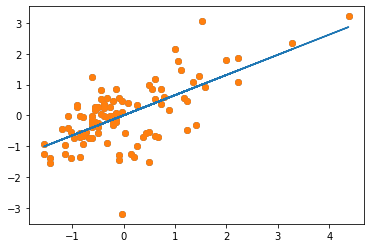

Minimum Cost:  0.28544530059133544
Minimum Cost achieved at:  [[-5.99072458e-14]
 [ 6.55002316e-01]]
Total iterations:  57


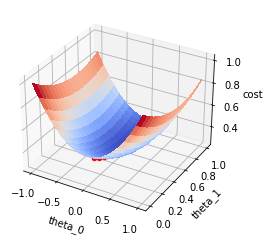

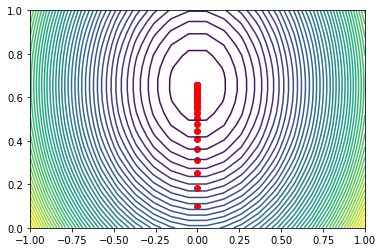

In [9]:

def read_data(Xpath="data/q1/linearX.csv",Ypath="data/q1/linearY.csv"):
    X = np.array(pd.read_csv(Xpath,header=None).values)
    Y = np.array(pd.read_csv(Ypath,header=None).values)
    X = normalize(X)
    # TODO: Do not normalize Y
    Y = normalize(Y)
    return X,Y

def normalize(X):
    mean=np.mean(X)
    std=np.var(X)**0.5
    X=(X-mean)/std
    return X

def augment_intecept(X):
    return np.c_[np.ones(m),X]

def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]
def gradient_descent(X,Y,epsilon,alpha,max_iter):
    theta = np.zeros((X.shape[1],1))
    m=len(X)
    converged=False
    cost_last=-1
    plotTheta=[]
    plotCost=[]
    iter=0
    while not converged:
        iter+=1
        H = np.dot(X,theta)
        grad=np.dot(X.T,(H-Y))/(2*m)
        theta=theta-alpha*grad
        cost=get_cost(X,Y,theta)
        if abs(cost_last-cost)<epsilon or iter>max_iter:
            converged=True
        cost_last=cost
        plotTheta.append(theta)
        plotCost.append(cost)
    plt.scatter(X[:,1:],Y)
    plt.plot(X[:,1:],H)
    plt.show()
    return plotTheta,plotCost,iter

def get_matrix(x1_size,x2_size,Y):

    # TODO: Adjust parameters before final submission
    theta1sample = np.linspace(-1,1,x1_size)
    theta2sample = np.linspace(0,1,x2_size)
    X1,X2 = np.meshgrid(theta1sample,theta2sample)
    J = np.asmatrix(np.zeros((x1_size,x2_size),dtype=float))
    for i in range(len(X1)):
        for j in range(len(X2)):
            J[i,j] = get_cost(X,Y,[[X1[i][j]],[X2[i][j]]])
    return X1,X2,J

def plot_mesh(X1,X2,J,plotTheta,plotCost):
    plt.ion()
    
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,np.array(J),cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('cost')
    theta1=np.array(plotTheta)[:,0]
    theta2=np.array(plotTheta)[:,1]
    for i in range(len(plotCost)):
        ax.scatter(theta1[i],theta2[i],plotCost[i],color='red')
        # TODO: Change pause time
        # plt.pause(0.1)
    plt.ioff()
    plt.show()

def plot_contour(X1,X2,J,plotTheta,plotCost):
    theta1=np.array(plotTheta)[:,0]
    theta2=np.array(plotTheta)[:,1]
    assert len(plotTheta)==len(plotCost)
    cp=plt.contour(X1,X2,np.array(J),50)
    plt.ion()
    for i in range(len(plotCost)):
        plt.scatter(theta1[i],theta2[i],color='red')
        # TODO: Change pause time
        # plt.pause(0.1)
    plt.ioff()
    plt.show()

# main function
if __name__ == "__main__":
    X,Y = read_data()
    X1=X
    m=len(X)
    # plot data
    plt.scatter(X,Y)
    X = augment_intecept(X)
    # gradient descent
    alpha=0.3
    epsilon=1e-9
    plotTheta,plotCost,iter=gradient_descent(X,Y,epsilon=epsilon,alpha=alpha,max_iter=100000)
    print("Minimum Cost: ",plotCost[-1])
    print("Minimum Cost achieved at: ",plotTheta[-1])
    print("Total iterations: ",iter)
    # print(plotTheta)
    # print(plotCost)
    # plot 3D mesh
    X1,X2,J = get_matrix(20,20,Y)
    plot_mesh(X1,X2,J,plotTheta,plotCost)
    # plot contour
    plot_contour(X1,X2,J,plotTheta,plotCost)
    # TODO: Save plots

